In [4]:
import imblearn
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter
import matplotlib.pyplot as plt
from numpy import where
import numpy as np


In [2]:
file_path = '/Users/imdaegyeong/Desktop/파이썬 연습장/xgboost/Train.csv'
data = pd.read_csv(file_path)

data

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,1,1,2.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1759,40,200,5.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1760,96,218,2.2708,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1761,16,81,5.0625,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 피처와 타겟 변수 분리
X = data.drop('Class', axis=1)
y = data['Class']
# 훈련 세트와 테스트 세트로 분리 (여기서는 오버 샘플링만 필요하므로 전체 데이터를 사용할 수도 있음)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 결과 출력
print(f"오버 샘플링 전: {y_train.value_counts()}")
print(f"오버 샘플링 후: {y_resampled.value_counts()}")

오버 샘플링 전: Class
0    1293
1     117
Name: count, dtype: int64
오버 샘플링 후: Class
0    1293
1    1293
Name: count, dtype: int64


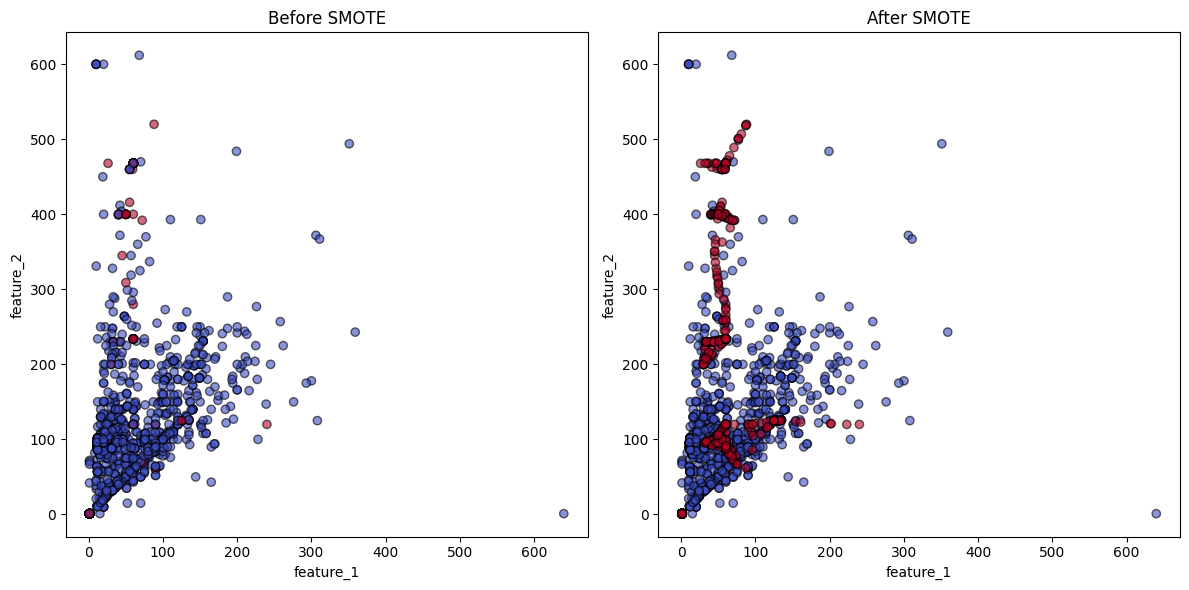

In [5]:
# SMOTE 적용 전후 피처를 기준으로 시각화
def plot_scatter(X_before, y_before, X_after, y_after, feature_x, feature_y, title_before="Before SMOTE", title_after="After SMOTE"):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # SMOTE 적용 전
    axs[0].scatter(X_before[feature_x], X_before[feature_y], c=y_before, cmap='coolwarm', alpha=0.6, edgecolors='k')
    axs[0].set_title(title_before)
    axs[0].set_xlabel(feature_x)
    axs[0].set_ylabel(feature_y)

    # SMOTE 적용 후
    axs[1].scatter(X_after[feature_x], X_after[feature_y], c=y_after, cmap='coolwarm', alpha=0.6, edgecolors='k')
    axs[1].set_title(title_after)
    axs[1].set_xlabel(feature_x)
    axs[1].set_ylabel(feature_y)

    plt.tight_layout()
    plt.show()

# feature_1과 feature_2를 선택하여 시각화 (원하는 다른 피처를 선택할 수도 있음)
plot_scatter(X_train, y_train, X_resampled, y_resampled, 'feature_1', 'feature_2')


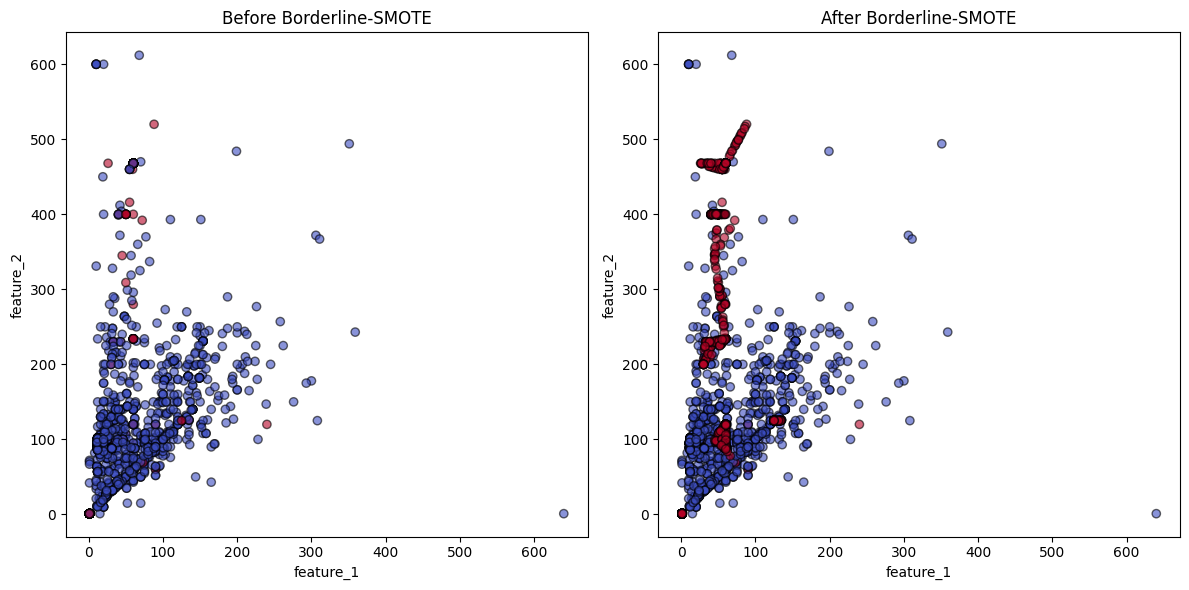

In [6]:
from imblearn.over_sampling import BorderlineSMOTE
import matplotlib.pyplot as plt

# Borderline-SMOTE 적용
border_smote = BorderlineSMOTE(random_state=42)
X_resampled_border, y_resampled_border = border_smote.fit_resample(X_train, y_train)

# SMOTE 적용 전후 피처를 기준으로 시각화
def plot_scatter_borderline(X_before, y_before, X_after, y_after, feature_x, feature_y, title_before="Before Borderline-SMOTE", title_after="After Borderline-SMOTE"):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Borderline-SMOTE 적용 전
    axs[0].scatter(X_before[feature_x], X_before[feature_y], c=y_before, cmap='coolwarm', alpha=0.6, edgecolors='k')
    axs[0].set_title(title_before)
    axs[0].set_xlabel(feature_x)
    axs[0].set_ylabel(feature_y)

    # Borderline-SMOTE 적용 후
    axs[1].scatter(X_after[feature_x], X_after[feature_y], c=y_after, cmap='coolwarm', alpha=0.6, edgecolors='k')
    axs[1].set_title(title_after)
    axs[1].set_xlabel(feature_x)
    axs[1].set_ylabel(feature_y)

    plt.tight_layout()
    plt.show()

# feature_1과 feature_2를 선택하여 시각화 (다른 피처를 선택할 수도 있음)
plot_scatter_borderline(X_train, y_train, X_resampled_border, y_resampled_border, 'feature_1', 'feature_2')

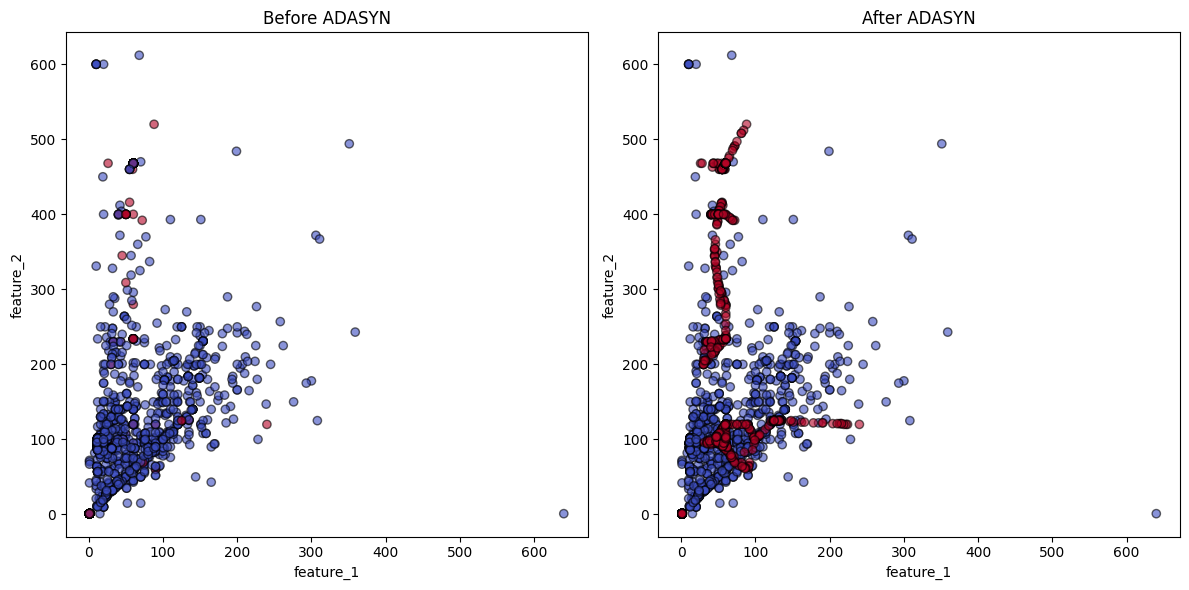

In [7]:
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt

# ADASYN 적용
adasyn = ADASYN(random_state=42)
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_train, y_train)

# SMOTE 적용 전후 피처를 기준으로 시각화
def plot_scatter_adasyn(X_before, y_before, X_after, y_after, feature_x, feature_y, title_before="Before ADASYN", title_after="After ADASYN"):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # ADASYN 적용 전
    axs[0].scatter(X_before[feature_x], X_before[feature_y], c=y_before, cmap='coolwarm', alpha=0.6, edgecolors='k')
    axs[0].set_title(title_before)
    axs[0].set_xlabel(feature_x)
    axs[0].set_ylabel(feature_y)

    # ADASYN 적용 후
    axs[1].scatter(X_after[feature_x], X_after[feature_y], c=y_after, cmap='coolwarm', alpha=0.6, edgecolors='k')
    axs[1].set_title(title_after)
    axs[1].set_xlabel(feature_x)
    axs[1].set_ylabel(feature_y)

    plt.tight_layout()
    plt.show()

# feature_1과 feature_2를 선택하여 시각화 (다른 피처를 선택할 수도 있음)
plot_scatter_adasyn(X_train, y_train, X_resampled_adasyn, y_resampled_adasyn, 'feature_1', 'feature_2')


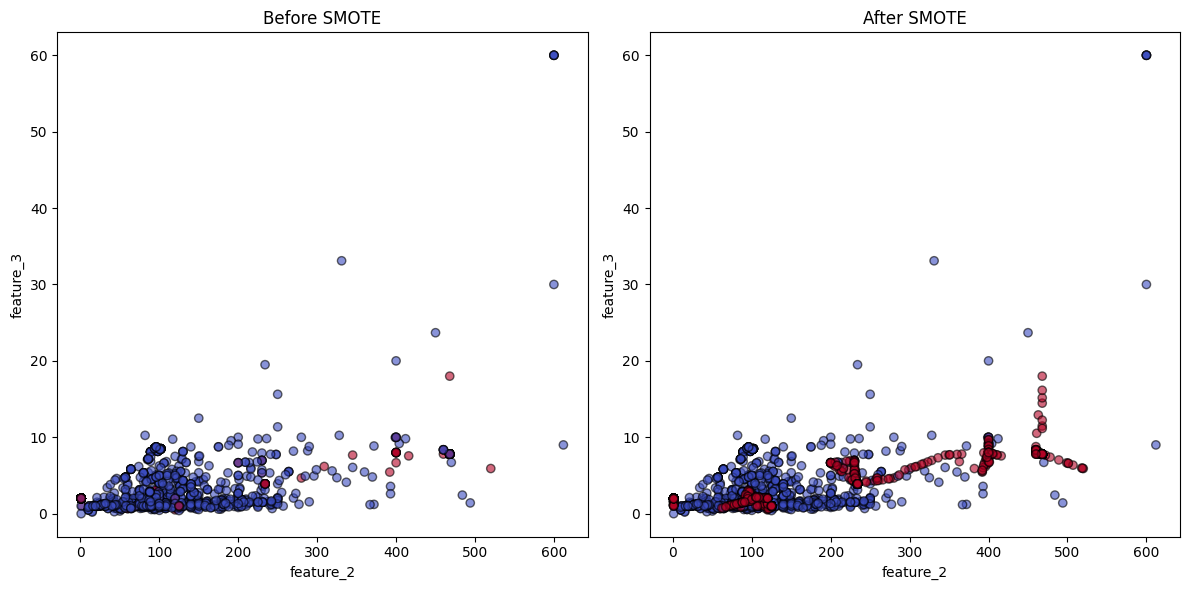

In [9]:
# 피처 2와 3
# SMOTE 적용 전후 피처를 기준으로 시각화
def plot_scatter(X_before, y_before, X_after, y_after, feature_x, feature_y, title_before="Before SMOTE", title_after="After SMOTE"):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # SMOTE 적용 전
    axs[0].scatter(X_before[feature_x], X_before[feature_y], c=y_before, cmap='coolwarm', alpha=0.6, edgecolors='k')
    axs[0].set_title(title_before)
    axs[0].set_xlabel(feature_x)
    axs[0].set_ylabel(feature_y)

    # SMOTE 적용 후
    axs[1].scatter(X_after[feature_x], X_after[feature_y], c=y_after, cmap='coolwarm', alpha=0.6, edgecolors='k')
    axs[1].set_title(title_after)
    axs[1].set_xlabel(feature_x)
    axs[1].set_ylabel(feature_y)

    plt.tight_layout()
    plt.show()

# feature_1과 feature_2를 선택하여 시각화 (원하는 다른 피처를 선택할 수도 있음)
plot_scatter(X_train, y_train, X_resampled, y_resampled, 'feature_2', 'feature_3')
